In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import seaborn as sns

#The dataset to develop this work, has 444700 rows, and 6 columns related to the traffic crashes.
#The data analysis is focus on some statistics and relationships among the considered variables.
#Now it is presented some visualizations about the traffic crashes in different conditions.

datatoload = "data_traffic_crashes.csv"
datawork = pd.read_csv(datatoload)

datawork

,speedlimit,devicecondic,lightingcondic,crashtype,roadway,roaddefect
0,10,NO CONTROLS,DARKNESS,PARKED MOTOR VEHICLE,DRY,NO DEFECTS
1,45,NO CONTROLS,DAYLIGHT,SIDESWIPE SAME DIRECTION,DRY,NO DEFECTS
2,35,FUNCTIONING PROPERLY,DAYLIGHT,TURNING,DRY,NO DEFECTS
3,30,FUNCTIONING PROPERLY,DARKNESS LIGHTED ROAD,TURNING,DRY,NO DEFECTS
4,35,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,DRY,NO DEFECTS
...,...,...,...,...,...,...
444695,30,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,DRY,NO DEFECTS
444696,30,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,DRY,NO DEFECTS
444697,30,FUNCTIONING PROPERLY,DAYLIGHT,REAR END,DRY,NO DEFECTS
444698,30,NO CONTROLS,DAYLIGHT,PARKED MOTOR VEHICLE,DRY,NO DEFECTS


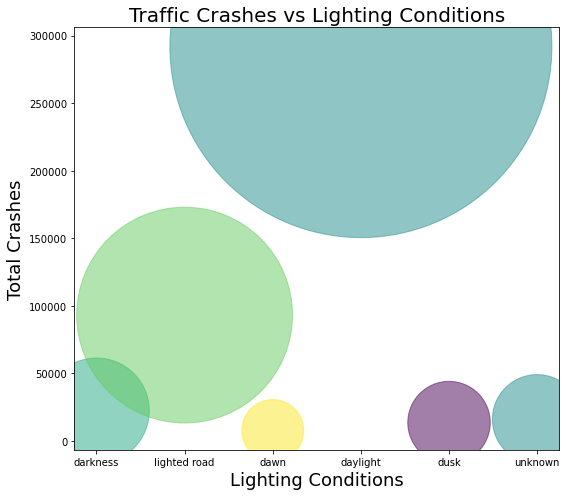

In [17]:
#Here is the visualization of the traffic crashes vs lighting conditions

#x = datawork.lightingcondic.unique()
x = pd.array(['darkness','lighted road','dawn','daylight','dusk','unknown'])
y = datawork.groupby("lightingcondic")["lightingcondic"].count()
area = datawork.groupby("lightingcondic")["lightingcondic"].count()/2
N = len(datawork.lightingcondic.unique())
colors = np.random.rand(N)

plt.figure(figsize = (8,7))

df = pd.DataFrame({
    'X':x,
    'Y':y,
    'Colors': colors,
    "bubble_size":area
})
plt.scatter('X', 'Y',
            s='bubble_size',
            c='Colors',
            alpha = 0.5,
            data = df)
plt.title("Traffic Crashes vs Lighting Conditions", size = 20)
plt.xlabel("Lighting Conditions", size = 18)
plt.ylabel("Total Crashes", size = 18)
plt.savefig('Images/traffic-crashes-vs-lighting-conditions.png')
plt.tight_layout()

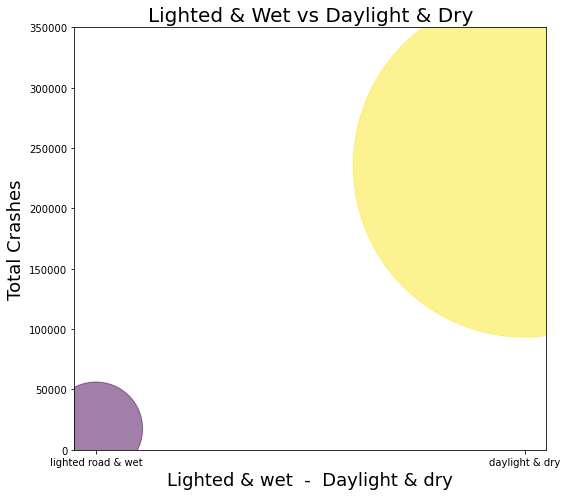

In [16]:
#Here is the visualization of the traffic crashes when it is: Lighted & wet vs Daylight & dry

x = pd.array(['lighted road & wet','daylight & dry'])
y = pd.array([17460, 235518])
area = pd.array([17460, 235518]) / 2
N = 2
colors = np.random.rand(N)

plt.figure(figsize = (8,7))
plt.ylim(0, 350000)

df = pd.DataFrame({
    'X':x,
    'Y':y,
    'Colors': colors,
    "bubble_size":area
})
plt.scatter('X', 'Y',
            s='bubble_size',
            c='Colors',
            alpha = 0.5,
            data = df)
plt.title("Lighted & Wet vs Daylight & Dry", size = 20)
plt.xlabel("Lighted & wet  -  Daylight & dry", size = 18)
plt.ylabel("Total Crashes", size = 18)
plt.savefig('Images/wet-vs-dry.png')
plt.tight_layout()

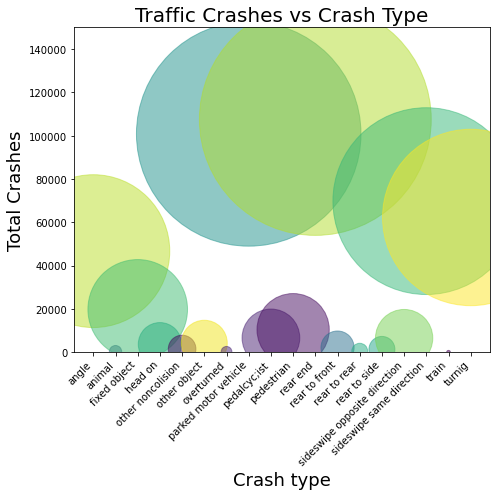

In [13]:
#Here is the visualization of the traffic crashes vs crash type

#x = datawork.crashtype.unique()
x = pd.array(['angle','animal','fixed object','head on','other noncolision','other object','overturned',
             'parked motor vehicle','pedalcyc;ist','pedestrian','rear end','rear to front',
             'rear to rear','rear to side','sideswipe opposite direction','sideswipe same direction',
             'train','turnig'])
y = datawork.groupby("crashtype")["crashtype"].count()
area = datawork.groupby("crashtype")["crashtype"].count()/2
N = len(datawork.crashtype.unique())
colors = np.random.rand(N)

plt.figure(figsize = (7,7))
plt.ylim(0, 150000)

df = pd.DataFrame({
    'X':x,
    'Y':y,
    'Colors': colors,
    "bubble_size":area
})
plt.scatter('X', 'Y',
            s='bubble_size',
            c='Colors',
            alpha = 0.5,
            data = df)
plt.title("Traffic Crashes vs Crash Type", size = 20)
plt.xlabel("Crash type", size = 18)
plt.ylabel("Total Crashes", size = 18)
plt.xticks(rotation = 45, ha='right')
# plt.savefig('Images/crash-type.png')
plt.tight_layout()
plt.savefig('Images/crash-type.png')

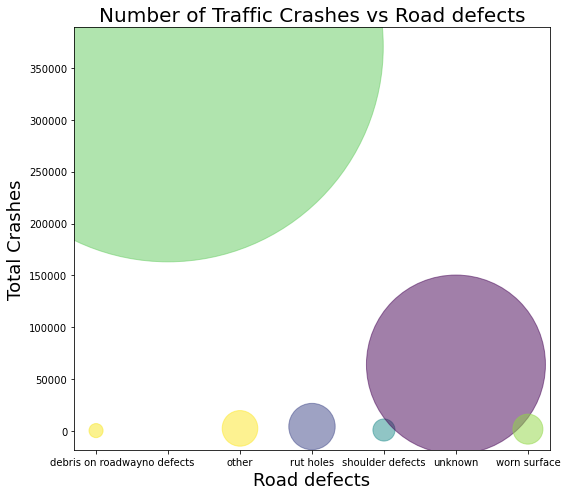

In [18]:
#What about the defects of the road? Do they affect the frequency of the traffic crashes?
#It seems that most of the traffic crashes occur in no-defects road.

#x = datawork.roaddefect.unique()

x = pd.array(['debris on roadway','no defects','other','rut holes','shoulder defects','unknown','worn surface'])
y = datawork.groupby("roaddefect")["roaddefect"].count()
area = datawork.groupby("roaddefect")["roaddefect"].count()/2
N = len(datawork.roaddefect.unique())
colors = np.random.rand(N)

plt.figure(figsize = (8,7))
#plt.ylim(0, 400000)

df = pd.DataFrame({
    'X':x,
    'Y':y,
    'Colors': colors,
    "bubble_size":area
})
plt.scatter('X', 'Y',
            s='bubble_size',
            c='Colors',
            alpha = 0.5,
            data = df)
plt.title("Number of Traffic Crashes vs Road defects", size = 20)
plt.xlabel("Road defects", size = 18)
plt.ylabel("Total Crashes", size = 18)
#plt.xticks(rotation = 90)
plt.savefig('Images/road-defects.png')
plt.tight_layout()

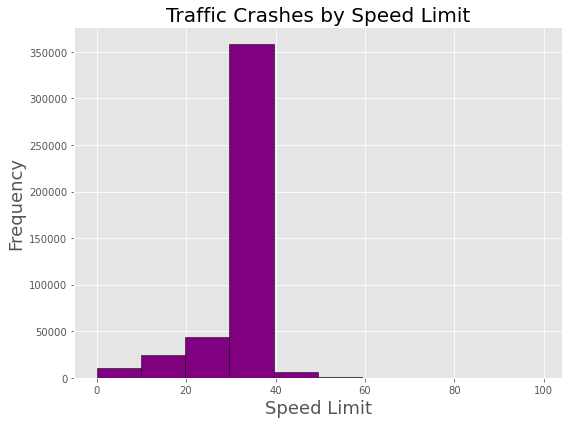

In [22]:
#Let us observe the frequency of traffic crashes by speed limit
# Histograms
average = datawork['speedlimit'].mean()
plt.style.use('ggplot')

# histogram of the speed limit

datawork.speedlimit.plot(kind = 'hist', color = 'purple', edgecolor = 'black', figsize = (8,6))
plt.title("Traffic Crashes by Speed Limit", size = 20)
plt.xlabel('Speed Limit', size = 18)
plt.ylabel('Frequency', size = 18)
plt.tight_layout()
plt.savefig('Images/speed-limit.png')
# print(f"Average speed limit for all accidents = {round(average,1)}")

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

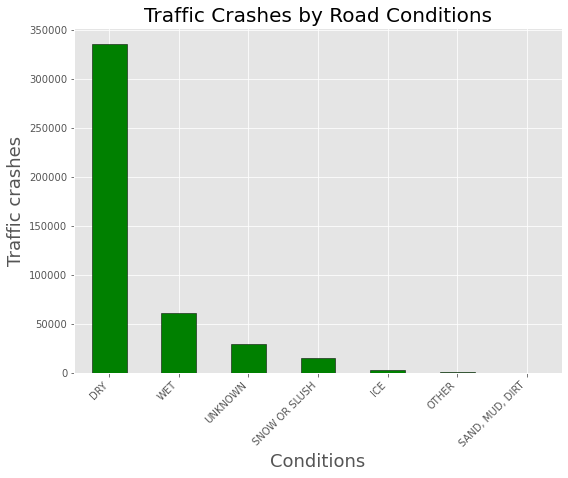

In [20]:
#This is about the number of traffic crashes occurred in each road condition, into a bar graph.
#datawork["roadway"].value_counts().unique ; in case it is needed

datawork["roadway"].value_counts().plot(kind = 'bar', color = 'green', edgecolor = 'black', figsize = (8,7))
plt.title("Traffic Crashes by Road Conditions", size = 20)
plt.xlabel('Conditions', size = 18)
plt.ylabel('Traffic crashes', size = 18)
plt.tight_layout()
plt.savefig('Images/conditions.png')
plt.xticks(rotation = 45, ha='right')